In [74]:
import pandas as pd 
import gmaps
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import csv
with open("PEP_2018_PEPANNRES_with_ann.csv", encoding = "utf8") as csvfile:
    csvreader=csv.reader(csvfile,delimiter=",")

In [75]:
fastfood = "FastFoodRestaurants.csv"
obesity="Obesity.csv"
state_ab="state_abbrev.csv"
rural_urban="countryobesity.csv"
population = "PEP_2018_PEPANNRES_with_ann.csv"
census="Census.csv"

In [76]:
fastfood_df = pd.read_csv(fastfood)
obesity_df = pd.read_csv(obesity)
state_df=pd.read_csv(state_ab)
rural_df=pd.read_csv(rural_urban)
census_df=pd.read_csv(census)


In [77]:
websites_drop=fastfood_df.drop("websites", axis=1)

In [78]:
ffgroupby=fastfood_df.groupby("province")
ff_state=ffgroupby.count()
foodbystate=ff_state.sort_values(by="address", ascending=False)
droppedfood=foodbystate.drop(["address","city","country","keys","latitude","longitude","postalCode","websites"],axis=1)


In [79]:
unstackfood=droppedfood.unstack(level=0)["name"]
indexed_unstack=unstackfood.reset_index()
codes=indexed_unstack.rename({'province': 'Code',0:'FF Restaurants'}, axis=1)
statecodes=codes
codedstates=statecodes.head(51)


In [80]:
merge_states=state_df.merge(codedstates, how='left', left_on="Code", right_on="Code")
obesitymerged=merge_states.merge(state,how='left', left_on="State", right_on="State")
graphedobesity=obesitymerged.drop(columns=["Abbrev"])
FinishedObesity=graphedobesity.sort_values(by="FF Restaurants", ascending=False)
FinishedObesity.set_index("Code", inplace=True)
FinishedObesity

,State,FF Restaurants,Obesity
Code,,,
CA,California,676,24.2
TX,Texas,634,32.4
OH,Ohio,543,29.8
FL,Florida,471,26.8
IN,Indiana,379,31.3
IL,Illinois,363,30.8
NC,North Carolina,358,30.1
GA,Georgia,347,30.7
MO,Missouri,334,32.4


Text(0.5, 0, 'Percent Obesity by State')

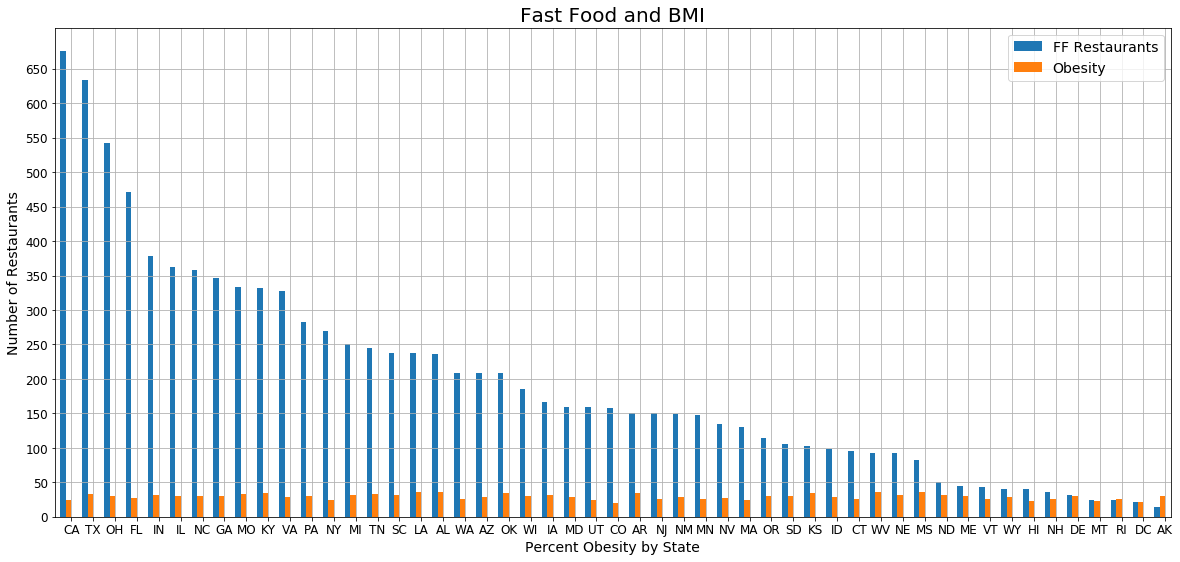

In [81]:
FinishedObesity.plot(kind='bar',
                        figsize=(20,9),
                       position=1,
                       grid=True,
                       yticks=np.arange(0,700,50),
                        legend=True,
                       fontsize=12)
plt.legend(fontsize=14)
plt.xticks(rotation=0)
plt.title("Fast Food and BMI", fontsize=20)
plt.ylabel("Number of Restaurants", fontsize=14)
plt.xlabel("Percent Obesity by State",fontsize=14)


In [82]:
groupbycity=fastfood_df.groupby("city")
ff_city=groupbycity.count()
descending_city=ff_city.sort_values(by="province", ascending=False)
city_res=descending_city.drop(["address","province","country","keys","latitude","longitude","postalCode","websites"],axis=1)
headcity=city_res.head(27)
indexcities=headcity.reset_index()
dropped_cities=indexcities.drop([10,13])
finishedcities=dropped_cities.reset_index()
abccities=finishedcities.reset_index()
FFCITIESCOUNT=abccities.drop(columns=['index'])

In [83]:
population_df = pd.read_csv(population, encoding="latin1")
pop2018=population_df[["GEO.display-label","respop72018"]]
pop2018.set_index("GEO.display-label", inplace=True)
pop2018

,respop72018
GEO.display-label,
Geography,Population Estimate (as of July 1) - 2018
"Abbeville city, Alabama",2563
"Adamsville city, Alabama",4325
"Addison town, Alabama",724
"Akron town, Alabama",330
...,...
"Wamsutter town, Wyoming",478
"Wheatland town, Wyoming",3553
"Worland city, Wyoming",5075


In [84]:
select_cities=pop2018.loc[["Cincinnati city, Ohio","Las Vegas city, Nevada",
            "Houston city, Texas", "Miami city, Florida",
            "Denver city, Colorado","Chicago city, Illinois",
            "Phoenix city, Arizona", "Columbus city, Ohio",
            "Atlanta city, Georgia","Oklahoma City city, Oklahoma",
            "Cleveland city, Ohio","New York city, New York",
             "Albuquerque city, New Mexico","Greenville city, South Carolina",
             "Columbia city, South Carolina","Rapid City city, South Dakota",
            "Portland city, Oregon","St. Paul city, Minnesota","St. Louis city, Missouri",
            "Jacksonville city, Florida","Los Angeles city, California",
             "Minneapolis city, Minnesota","Dallas city, Texas",
            "Jackson city, Mississippi","Austin city, Texas"]]
indexingcities=select_cities.reset_index()
city_stateindex=indexingcities.reset_index()
city_stateindex

,index,GEO.display-label,respop72018
0,0,"Cincinnati city, Ohio",302605
1,1,"Las Vegas city, Nevada",644644
2,2,"Houston city, Texas",2325502
3,3,"Miami city, Florida",470914
4,4,"Denver city, Colorado",716492
5,5,"Chicago city, Illinois",2705994
6,6,"Phoenix city, Arizona",1660272
7,7,"Columbus city, Ohio",892533
8,8,"Atlanta city, Georgia",498044
9,9,"Oklahoma City city, Oklahoma",649021


In [85]:
merged_percap=FFCITIESCOUNT.merge(city_stateindex, how='left', left_on="level_0", right_on="index")
droppedmerged_percap=merged_percap.drop(columns=['level_0','index','GEO.display-label'])
finished_percapmerge=droppedmerged_percap.rename(columns={"city":"CITY","name":"RESTAURANTS","respop72018":"POPULATION"})

In [86]:
finished_percapmerge['POPULATION'] = finished_percapmerge['POPULATION'].astype(float)

In [87]:
finished_percapmerge['PERCAP'] = finished_percapmerge["RESTAURANTS"]/finished_percapmerge["POPULATION"]*100000
PerCap=finished_percapmerge.sort_values(["PERCAP"],ascending=False)
FINper=PerCap.drop(columns="POPULATION")
FINPERCAP=FINper.set_index("CITY")
FINPERCAP

,RESTAURANTS,PERCAP
CITY,,
Greenville,34,49.589429
Rapid City,34,45.067137
Cincinnati,119,39.325193
Columbia,34,25.477516
Jackson,32,19.462116
Miami,58,12.316474
Las Vegas,72,11.168955
Saint Louis,33,10.896915
Saint Paul,33,10.724906


In [88]:
obesitypercentages=[29,28,33,34.3,39.5,34.2,38.2,27.4,28.4, 33.8, 35, 30.1, 22.3, 29.5, 32.4, 30.2, 34,
28.4, 27, 29.1, 22.8, 33.8, 27, 24, 21.9]
  
# Using 'Address' as the column name 
# and equating it to the list 
FINPERCAP['OBESITY'] = obesitypercentages 
FINISHED=FINPERCAP.drop(columns="RESTAURANTS")

Text(0.5, 0, 'Cities')

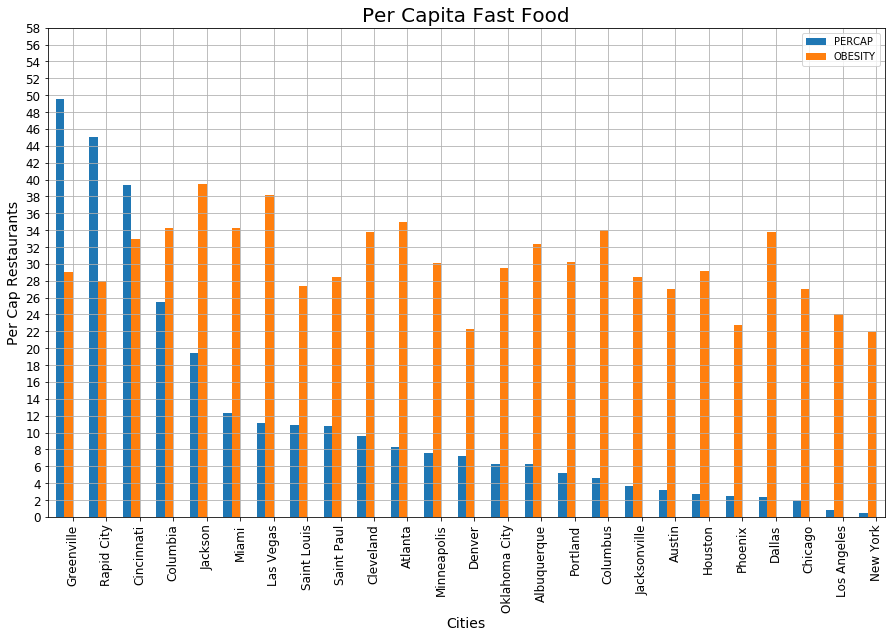

In [89]:
FINISHED.plot(kind='bar',
                        figsize=(15,9),
                       position=1,
                       grid=True,
                       yticks=np.arange(0,60,2),
                        legend=True,
                       fontsize=12,)
plt.title("Per Capita Fast Food", fontsize=20)
plt.ylabel("Per Cap Restaurants", fontsize=14)
plt.xlabel("Cities",fontsize=14)

In [90]:
obesity_percent=obesity_df.drop(["Shape__Length","Shape__Area","OBJECTID"],axis=1)
sorted_obesity=obesity_percent.sort_values(["NAME"],ascending=True)
index=sorted_obesity.reset_index()
index1=index.drop("index",axis=1)
index2=index1.drop([39])

In [91]:
censusdf=census_df.drop(columns=["State Code","Division"])

In [92]:
finished_sort=index2.reset_index()
finish_state=finished_sort.drop("index",axis=1)
state=finish_state.rename({'NAME': 'State'}, axis=1)
sorted_obes=state.sort_values("Obesity",ascending=False)
Regions=sorted_obes.merge(censusdf, how='left', left_on="State", right_on="State")

In [93]:
regionindex=Regions.set_index("Region")
regionindex

,State,Obesity
Region,,
South,Louisiana,36.2
South,Alabama,35.6
South,West Virginia,35.6
South,Mississippi,35.6
South,Kentucky,34.6
South,Arkansas,34.5
Midwest,Kansas,34.2
South,Oklahoma,33.9
South,Tennessee,33.8


In [103]:
regionindex["colors"]= "x"
regionindex.loc[regionindex.index=='South', 'colors']='red'
regionindex.loc[regionindex.index=='Midwest','colors']='orange'
regionindex.loc[regionindex.index=='Northeast','colors']='purple'
regionindex.loc[regionindex.index=='West','colors']='blue'
FINISHEDregion=regionindex


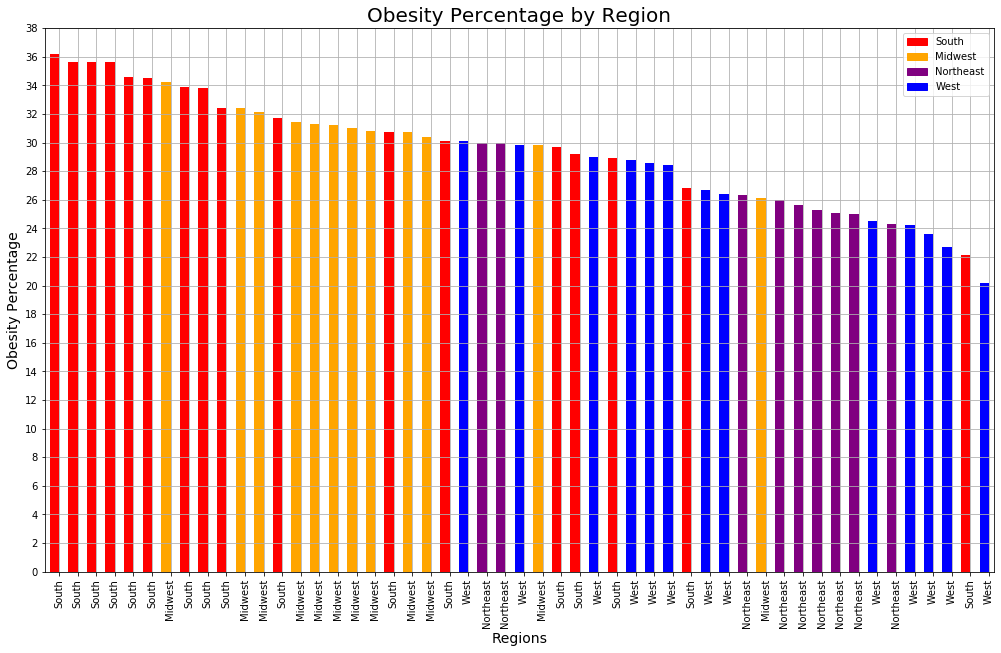

In [104]:
FINISHEDregion.plot(kind="bar", y="Obesity",color=regionindex.colors,
                figsize=(17,10),position=1,
                       grid=True,
                       yticks=np.arange(0,40,2),legend=False)

plt.title("Obesity Percentage by Region", fontsize=20)
plt.ylabel("Obesity Percentage", fontsize=14)
plt.xlabel("Regions",fontsize=14)

southc=mpatches.Patch(color='red',label='South')
midwestc=mpatches.Patch(color='orange',label='Midwest')
northeastc=mpatches.Patch(color='purple',label='Northeast')
west=mpatches.Patch(color='blue',label='West')
plt.legend(handles=[southc,midwestc,northeastc,west])

In [96]:
#regionindex.plot(kind='bar',
                       # figsize=(15,10),
                      # position=1,
                       #grid=True,
                       #yticks=np.arange(0,40,2),
                      #  legend=False,
                       #title="Obesity by Regions",
                       #fontsize=12,color=regionindex["colors"])
#plt.title("Obesity Percentage by Region", fontsize=20)
#plt.ylabel("Obesity Percentage", fontsize=14)
#plt.xlabel("Regions",fontsize=14)

In [97]:
national_bmi=({"Year":["90","91","92","93","94","95","96","97","98","99","00",
                       "01","02","03","04","05","06","07","08","09","10","11",
                       "12","13","14","15","16","17","18","19"],
               "BMI":["11.6","11.6","12.6","12.6","13.7","14.4","15.9","16.8","16.5","18.3",
                     "19.6","20","20.9","21.9","22.9","23.2","24.4","25.1","26.3","26.7",
                     "26.9","27.5","27.8","27.6","29.4","29.6","29.8","29.9","31.3","30.9"]})
national_df=pd.DataFrame(national_bmi)
graph_national=national_df.set_index("Year")
floatgraph=graph_national.astype(float)

Text(0.5, 0, 'Years')

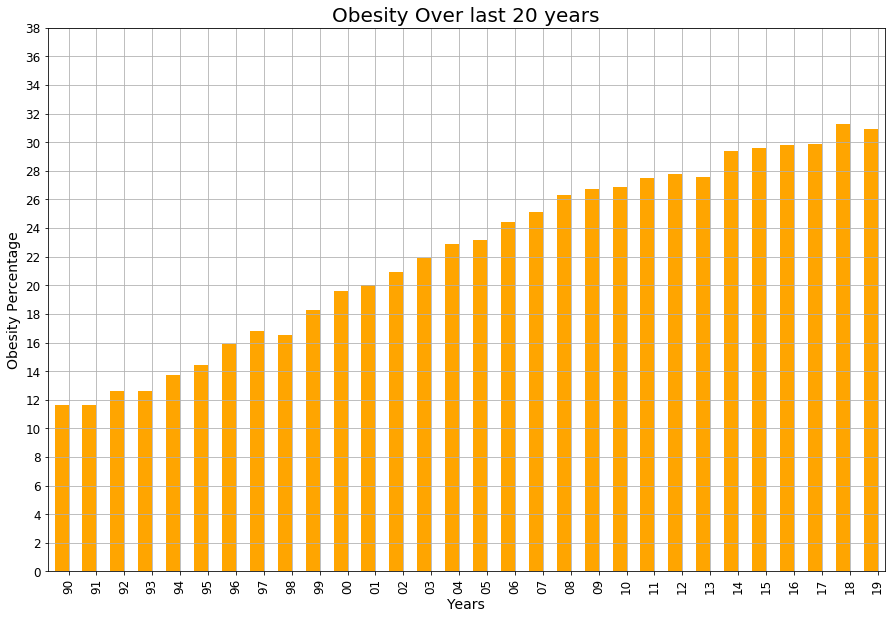

In [98]:
floatgraph.plot(kind='bar',
                        figsize=(15,10),
                       position=1,
                       grid=True,
                       yticks=np.arange(0,40,2),
                        legend=False,
                       fontsize=12,color="orange")

plt.title("Obesity Over last 20 years", fontsize=20)
plt.ylabel("Obesity Percentage", fontsize=14)
plt.xlabel("Years",fontsize=14)

In [99]:
exercise_obesity=rural_df.drop(columns=["State_FIPS_Code","Strata_ID_Number","CI_Min_Fruit_Veg","CI_Max_Fruit_Veg",
                      "Few_Fruit_Veg","Diabetes","CI_Min_Diabetes","CI_Max_Diabetes","Uninsured",
                      "Elderly_Medicare","Disabled_Medicare","Prim_Care_Phys_Rate","Dentist_Rate",
                       "Community_Health_Center_Ind","HPSA_Ind","High_Blood_Pres","CI_Min_High_Blood_Pres",
                       "CI_Max_High_Blood_Pres","Smoker","CI_Min_Smoker","CI_Max_Smoker","County_FIPS_Code",
                      "CHSI_State_Name","CI_Min_No_Exercise","CI_Min_No_Exercise","CI_Max_No_Exercise",
                        "CI_Min_Obesity","CI_Max_Obesity"])
Obesity_Exercise=exercise_obesity.rename({'CHSI_County_Name': 'COUNTY','CHSI_State_Abbr':'CODE','No_Exercise':'NOEXERCISE',
                                          'Obesity':'OBESITY',}, axis=1)

In [100]:
dropped_Obe=Obesity_Exercise[Obesity_Exercise.OBESITY != -1111.1]
dropped_Obesity=dropped_Obe[dropped_Obe.NOEXERCISE != -1111.1]
Finished_Exercise

,COUNTY,CODE,NOEXERCISE,OBESITY
0,Autauga,AL,27.8,24.5
1,Baldwin,AL,27.2,23.6
4,Blount,AL,33.5,24.2
6,Butler,AL,24.5,22.0
7,Calhoun,AL,29.2,27.0
...,...,...,...,...
3136,Sweetwater,WY,21.9,23.6
3137,Teton,WY,9.6,9.0
3138,Uinta,WY,23.4,22.7
3139,Washakie,WY,23.2,21.1
